In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import brian2 as bb
from brian2 import ms, second, Hz, mV, pA, nS, pF
from matplotlib import pyplot as plt
from tqdm import tqdm
import assemblyseq.assemblyseq as asq

faster_run = True

if faster_run:
    bb.set_device('cpp_standalone', directory='PETH_standalone', build_on_run=False)

In [2]:
bb.start_scope()
if faster_run:
    bb.get_device().reinit()
    bb.get_device().activate(build_on_run=False, directory='PETH_standalone')

nn = asq.Nets(Ne=20000, Ni=5000, cp_ee=.01, cp_ie=.01, cp_ei=0.01, cp_ii=.01,
              n_ass=10, s_ass=500, pr=.15, pf=.03, symmetric_sequence=True, p_rev=.03,
              g_ee=0.1 * nS, g_ie=0.1 * nS, g_ei=0.4 * nS, g_ii=0.4 * nS)

initiated  Fri May  8 13:49:29 2020


In [3]:
nn.generate_ps_assemblies('gen_no_overlap')
nn.set_net_connectivity()

nn.set_spike_monitor()
nn.set_rate_monitor()

for gr_num in tqdm(range(nn.n_ass)):
    gr = nn.p_ass_index[0][gr_num]
    t_inp = (20.55 + gr_num * .1) * second
    nn.set_noisy_input(gr, t_inp, sigma=0 * ms)

nn.balance(5 * second, 5.)
nn.balance(5 * second, 1.)
nn.balance(5 * second, .1)
nn.balance(5 * second, .01)
nn.run_sim(22*second)
# nn.Pe.I -= .0 * pA
if faster_run:
    bb.device.build(directory='STDP_standalone', compile=True, run=True, debug=False)

A random sequence without overlaps is created


100%|██████████| 10/10 [00:00<00:00, 74.18it/s]

connections imprinted!  Fri May  8 13:49:37 2020


balanced:  0.5418610572814941
balanced:  0.25904083251953125
balanced:  0.20376205444335938
balanced:  0.21448707580566406
run:  0.20734596252441406


In [4]:
from assemblyseq import plotter

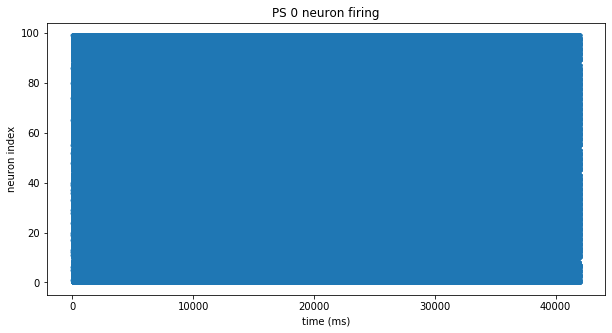

In [26]:
plt.figure(figsize=(10, 5))
plotter.plot_ps_raster(nn, chain_n=0, frac=.02)

In [7]:
a = [(1, 2), (3, 4), (5, 6)]

In [18]:
z, x = (zip(*a))

In [19]:
z

(1, 3, 5)

In [20]:
x

(2, 4, 6)